# Project Overview

## 1.Business Understanding

### Business Overview
 
Syriatel (Arabic: سيريتل) is is a telecommunications company in Syria. 

With an established network of 63 Points Of Service covering all Syrian territory, their Call Centers serve over 25,000 customer queries daily and operate a network of 2783 radio base station. 

It is recognized as one of the fastest growing operators in it's region, their skilled employees are proud to serve over 6 Million Customers and represent 55% share of the actual syrian market.

### Problem Statement

SyriaTel have been informed that some of their customers have started to churn- discontinue their service.They are interested in reducing how much money is lost because of customers who don't stick around very long.
This analysis aims to determine what features will indicate if a customer will ("soon") discontinue their service.

### Objectives

To determine what features will indicate if a customer will ("soon") discontinue their service
To develop a model that accurately predicts whether a customer will discontinue their service

### Success Criteron

Successfully modeling a model that accurately predicts whether a customer will discontinue their service

## 2.Data Understanding

This dataset was sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Each row represents a customer and columns represents customer details. 
Let's preview the data

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the compressed csv file into a dataframe and previewing the first 5 rows
df = pd.read_csv("archive.zip")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset has 3333 rows and 21 columns. Each column represents a customer and the columns represent the customer details such as;
-  the `state` the cusomer lives in,
- `account length`- the number of days the customer has had an account, 
-  the `area code` of where the customer lives, 
-  the customer's `phone number`,
- `international plan`- true if the customer has the international plan, otherwise false, 
- `voice mail plan`- true if the customer has a voice mail plan, otherwise false, 
- `number vmail messages`- the number of voicemails the customer has sent,
- `total day minutes`- the total number of minutes the customer has been on call during the day, 
-  `total day calls`- total number of calls the user has done during the day, 
-  `total day charge`- total amount of money the customer was charged for calls during the day,
-  `total eve minutes`- the total number of minutes the customer has been on call in the evening, 
-  `total eve calls`- the total number of calls the customer has been on in the evening, 
-  `total eve charge` - total amount of money the customer was charged calls during the evening,
-  `total night minutes` - the total number of minutes the customer has been on call at night, 
-  `total night calls`- total number of calls the user has done at night, 
-  `total night charge`- total amount of money the customer was charged for calls at night,
-  `total intl minutes`- the total number of minutes the customer has been on international calls, 
-  `total intl calls`- total number of international calls the customer has done, 
-  `total intl charge`- total amount of money the customer was charged for international calls,
-  `customer service calls`- number of calls the customer has made to customer service, 
-  `churn`- true if the customer terminated their contract, otherwise false

let's now inspect the distributions of the numeric features:

In [4]:
#checking the statistical features of the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3.Data Preparation and Analysis

### Data Cleaning

First we check our data for duplicates, missing/NaN values and Outliers and handle them

In [5]:
#checking for duplicates
df.duplicated().sum()

0

In [6]:
#checking for missing values and the df composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Now, since we don't have any duplicates or missing values, we'll go ahead and look at the structure and characteristics of our data

### Exploratory Data Analysis (EDA)


`phone number` and `state` columns contain unique values for each customer therefore they do not seem relevant in our analysis, so we'll drop them.

In [7]:
#dropping `phone number` and `state` columns
df = df.drop(['phone number', 'state'], axis=1)

We will start by performing our univariate analysis of our features. 
We'll a look at the distribution of the numerical columns using distribution plot so that we can understand the nature of the numerical features.

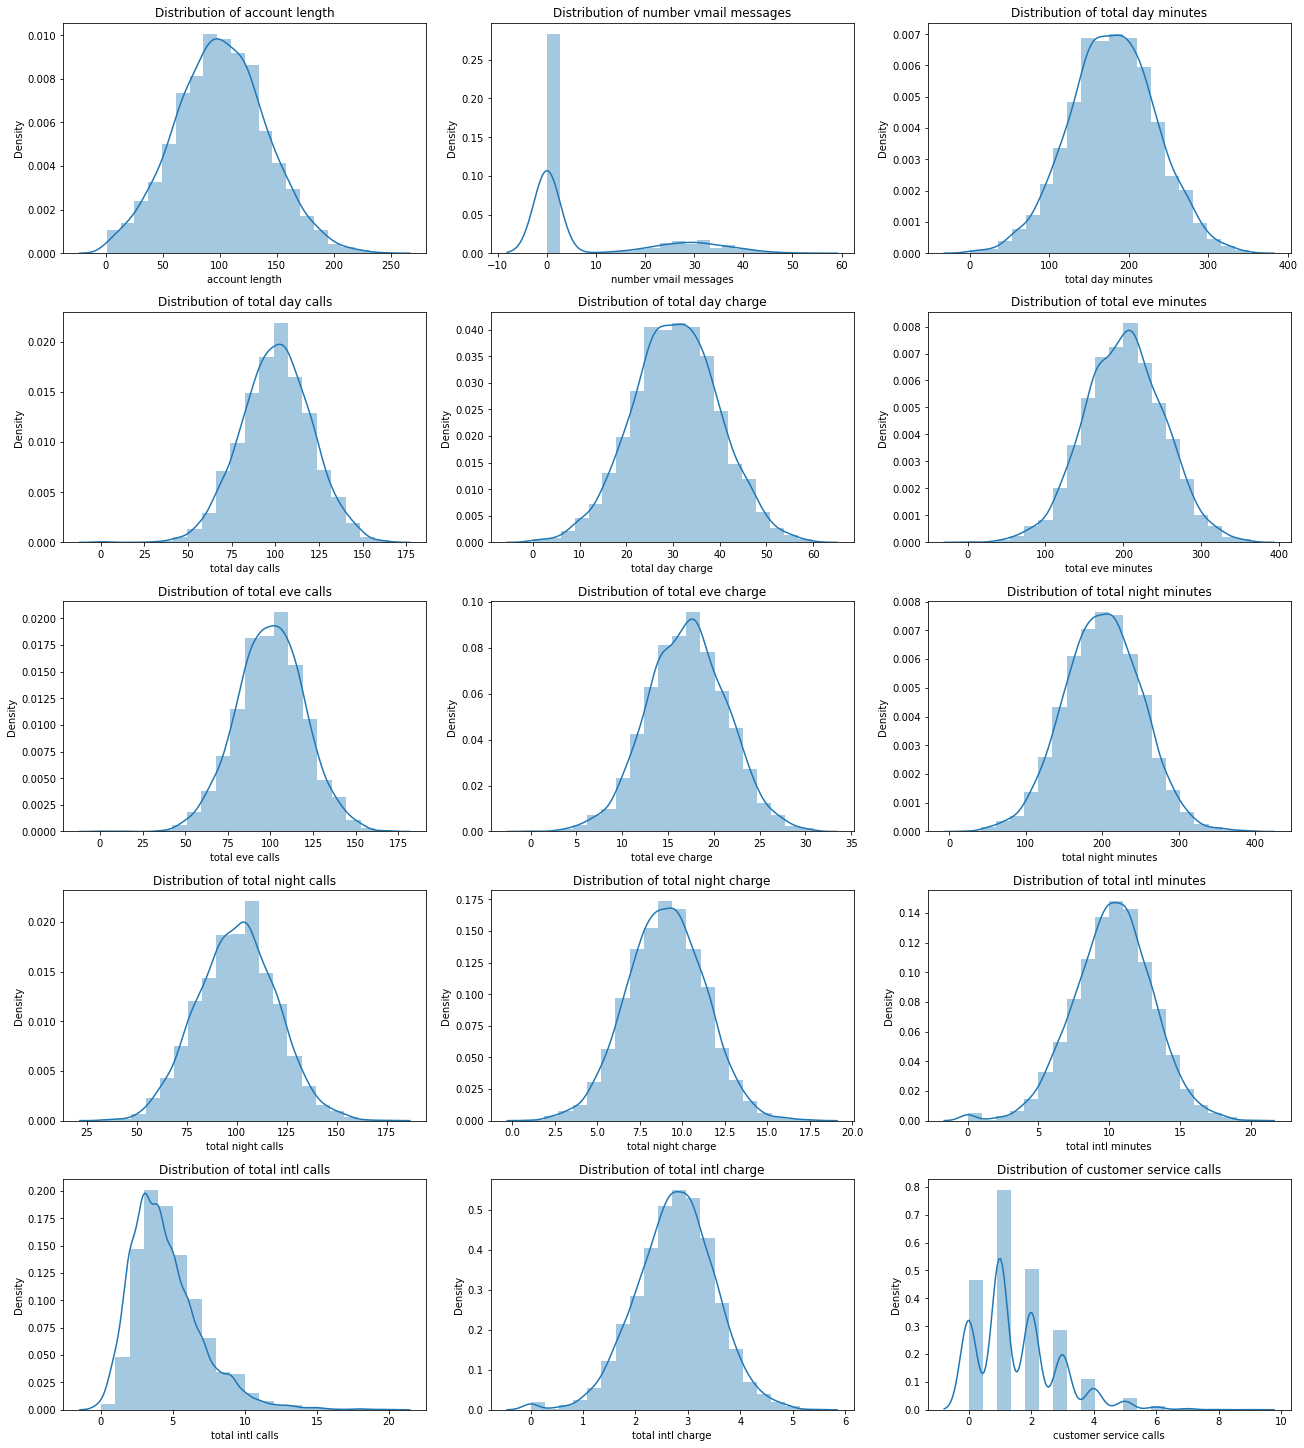

In [8]:
#importing my predefined class function
from project_functions import univariate_visualization

# defining numerical columns
numerical_columns = ['account length', 'number vmail messages', 'total day minutes',
                  'total day calls', 'total day charge', 'total eve minutes',
                  'total eve calls', 'total eve charge', 'total night minutes',
                  'total night calls', 'total night charge', 'total intl minutes',
                  'total intl calls', 'total intl charge', 'customer service calls']

#instantating the class and visualizing
univariate_visualization(df, numerical_columns).visualize()

from the above distribution plots, we notice that 12 out of our 15 numeric variables have a normal distribution of the values. 
let's go ahead and take a look at countplots visualizing the relationship between our categorical variables and the target variable `churn`

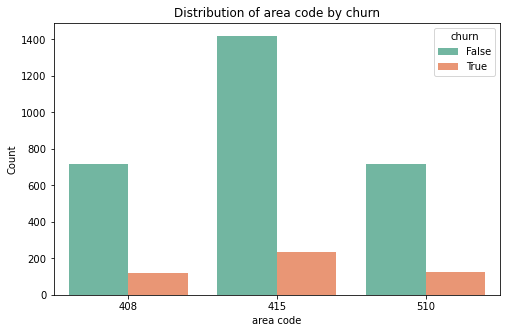

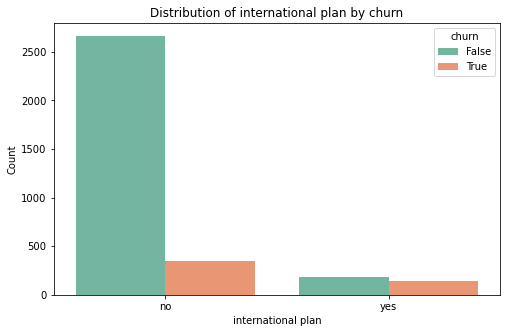

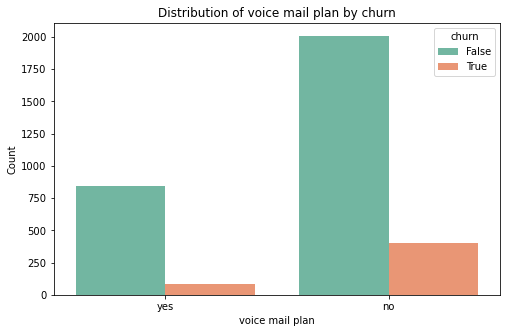

In [9]:
from project_functions import bivariate_visualization

# Defining categorical columns and the target column
categorical_columns = ['area code', 'international plan', 'voice mail plan']
target_column = 'churn'

#using the class function to visualize
bivariate_visualization(df, categorical_columns, target_column).visualize()

From the comparisons above, It looks like the number of customers who are not subscribed to plans is higher than those who have and for both instances and those who have dicontinued their service is lower than those who have in all 3 instances.

We can now convert the `churn` column into binary since we are dealing with a binary classification problem as well as One-hot-encode the categorical variables, dropping the first value of each category to avoid multicolliniarity

In [10]:
#One-hot-encoding the categorical columns
df = pd.get_dummies(df, columns=['area code', 'international plan', 'voice mail plan'], drop_first=True, dtype=int)

#converting churn column into binary
df['churn'] = df['churn'].astype(int)

In [11]:
#checking the number of features from our dataframe
len(df.columns)-1

19

19 is such a high number of features, in attempt to reduce our features, we will start by merging the total number of minutes, calls and charge and dropping the columns. This reduces them from 12 to 3 columns. 

In [12]:
# summing to create new columns for total minutes, calls and charge
df['total minutes'] = df['total day minutes']+df['total eve minutes']+df['total night minutes']+df['total intl minutes']
df['total calls'] = df['total day calls']+df['total eve calls']+df['total night calls']+df['total intl calls']
df['total charge'] = df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge']

In [13]:
#dropping the columns
df = df.drop(['total day minutes','total day calls', 'total day charge', 'total eve minutes','total eve calls', 'total eve charge', 'total night minutes','total night calls', 'total night charge', 'total intl minutes','total intl calls', 'total intl charge'], axis=1)

#previewing the remaining columns
df.columns

Index(['account length', 'number vmail messages', 'customer service calls',
       'churn', 'area code_415', 'area code_510', 'international plan_yes',
       'voice mail plan_yes', 'total minutes', 'total calls', 'total charge'],
      dtype='object')

We'll go ahead and check for correlation of the features with each other so that we can minimize multicolinearity

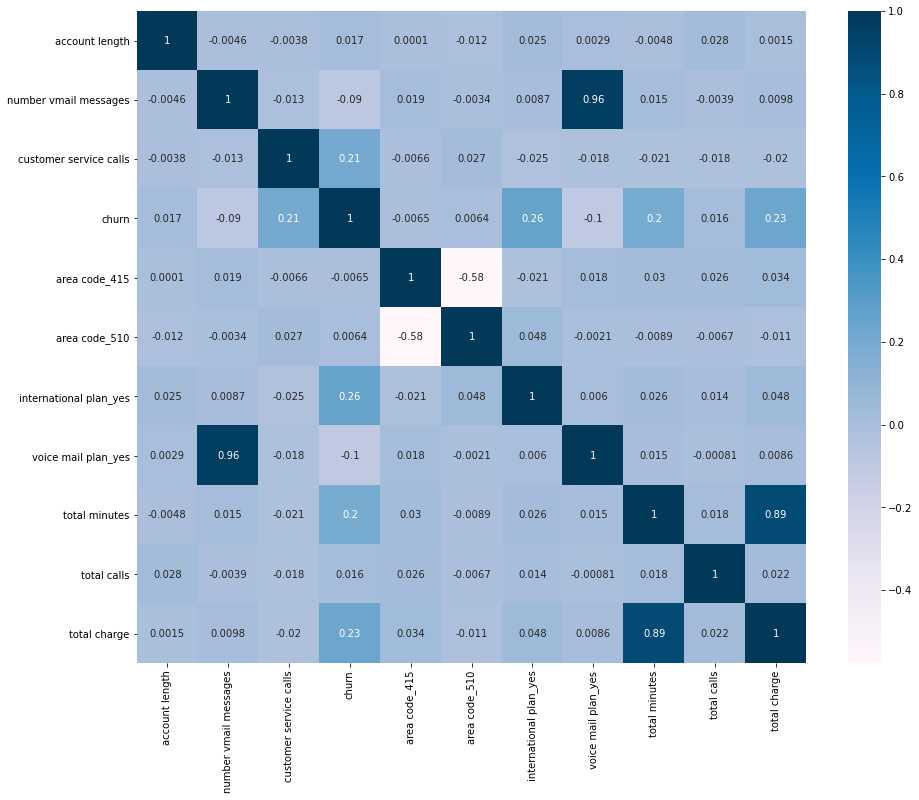

In [14]:
from project_functions import correlation

#plotting a correlation matrix
correlation(df).plot_correlationMatrix()

The analysis reveals that most features in the dataset exhibit little to no correlation, suggesting that the majority of variables are independent and do not share linear relationships.
However we notice that the correlation between `voice mail plan_yes` & `number vmail messages` and between `total charge` & `total minutes` is quite high, therefore we'll take a look at each of their correlations to the target variable and select from each the one with the higher correlation to `churn`.  

In [15]:
#checking the correlation coefficients
df.corr()['churn']

account length            0.016541
number vmail messages    -0.089728
customer service calls    0.208750
churn                     1.000000
area code_415            -0.006535
area code_510             0.006423
international plan_yes    0.259852
voice mail plan_yes      -0.102148
total minutes             0.198607
total calls               0.015807
total charge              0.231549
Name: churn, dtype: float64

In [16]:
#dropping total minutes and number of vmail messages columns
df = df.drop(['number vmail messages', 'total minutes'], axis=1)

#checking the number of remaining features
len(df.columns)-1

8

## 4.Modeling and Evaluation

We will start by building a simple logistic regression classifier model as our baseline model

In [17]:
#defining my target and features
y = df['churn']
X = df.drop(['churn'], axis=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# building a Logistic regression classifier model
baseline_model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

#fitting the model
baseline_model.fit(X_train, y_train)

#predicting
baseline_y_pred = baseline_model.predict(X_test)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear') Model Metrics
______________________________
The accuracy score is 0.848.
The F1 score is 0.216.
The recall score is 0.147.
The precision score is 0.412.
______________________________


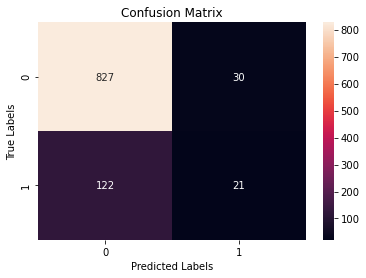

In [18]:
#importing the class function
from project_functions import model_metrics

##evaluating my baseline model by instantating the predifined class
model_metrics(baseline_model, y_test, baseline_y_pred).get_summary()

our baseline model has a high accuracy score of 0.848 means the model correctly predicts 84.8% of the total instances. However, An F1 score of 21.6% indicates the model is performing poorly, with significant issues in balancing precision, this means the model struggles to correctly classify the target class and makes many errors.

Below, let us try see how we can improve our model performance and take a look at our target variable value counts:

In [19]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

We notice that there is class imbalance and we will need to apply SMOTE(Synthetic Minority Oversampling) technique

In [20]:
from imblearn.over_sampling import SMOTE

X_train_sm, y_train_sm = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [21]:
y_train_sm.value_counts()

1    1993
0    1993
Name: churn, dtype: int64

We notice that the class distribution is now balanced

Now we will go ahead and normalize our features, by applying min-max scaling which transforms all feature values to a fixed range; between 0 and 1. This ensures that all features have the same scale.
We will scale the train-test data to ensures the scaling is based on the statistics (min and max) of the training data, avoiding data leakage from the test set.
MinMax scaling will also reduce the effects of outliers in our data since it is less sensitive to outliers.

In [25]:
from sklearn.preprocessing import MinMaxScaler

#instantate the MinMaxScaler
scaler = MinMaxScaler()
## Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_sm)  
# Only transform test data
X_test_scaled = scaler.transform(X_test) 

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear') Model Metrics
______________________________
The accuracy score is 0.748.
The F1 score is 0.203.
The recall score is 0.224.
The precision score is 0.185.
______________________________


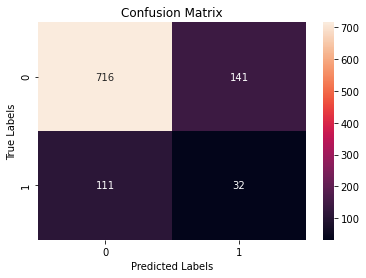

In [26]:
# build classifier for the smoted values
modified_lr_model = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
modified_lr_model.fit(X_train_scaled, y_train_sm)
modified_lr_y_pred = smoted_model.predict(X_test_scaled)

model_metrics(modified_lr_model, y_test, modified_lr_y_pred).get_summary()

Our `modified_lr_model` is performing significantly poorly, with a lower accuracy score of 0.748 compared to the baseline model. The model still has significant issues with balancing precision since it has an even lower f1 score of 20%

To solve this, let us build a classifier model. We will start with building a Decision tree Classifier and seeing how it performs

DecisionTreeClassifier(random_state=42) Model Metrics
______________________________
The accuracy score is 0.913.
The F1 score is 0.72.
The recall score is 0.783.
The precision score is 0.667.
______________________________


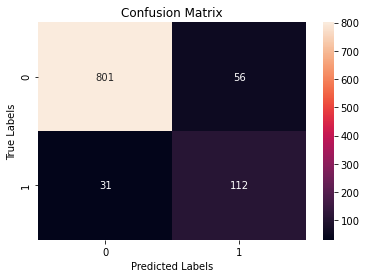

In [27]:
from sklearn.tree import DecisionTreeClassifier

#building a decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit and predict the model
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

#getting the model summary
model_metrics(dt_model, y_test, dt_y_pred).get_summary()

Great! We notice that our decision tree classifier performs better, our Decision tree classifier model predicts accurately 91% of the time and has a 72%  balancing precision which is a great improvement from our baseline

RandomForestClassifier(random_state=42) Model Metrics
______________________________
The accuracy score is 0.948.
The F1 score is 0.797.
The recall score is 0.713.
The precision score is 0.903.
______________________________


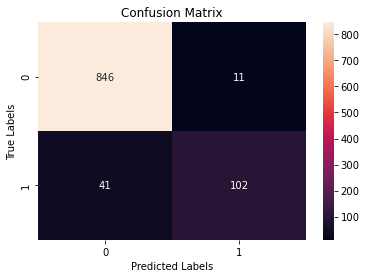

In [31]:
from sklearn.ensemble import RandomForestClassifier

#building a random forest classifier
clf = RandomForestClassifier(random_state=42)

#fitting the classifier
clf.fit(X_train, y_train)

# Make predictions
clfy_pred = clf.predict(X_test)

#getting the model summary
model_metrics(clf, y_test, clfy_pred).get_summary()

### Evaluation of the models

ROC curve and AUC

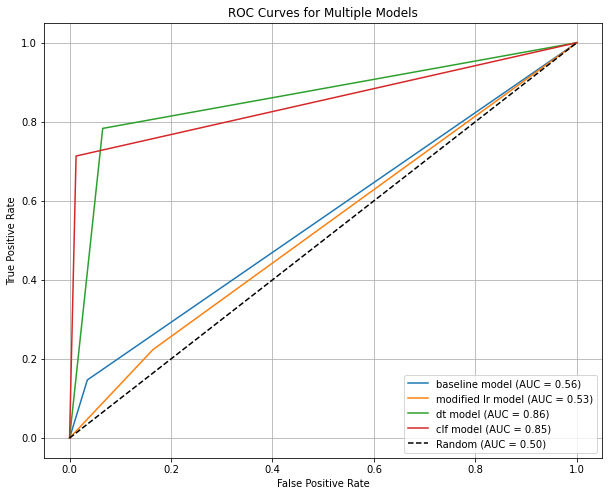

In [32]:
from project_functions import roc_curve_plotter

# Instantiate the roc_curve_plotter
roc_curve_plotter = roc_curve_plotter(y_test)

# Add models with their probabilities and names
roc_curve_plotter.add_model(baseline_y_pred, "baseline model")
roc_curve_plotter.add_model(modified_lr_y_pred, "modified lr model")
roc_curve_plotter.add_model(dt_y_pred, "dt model")
roc_curve_plotter.add_model(clfy_pred, "clf model")

# Plot the ROC curves
roc_curve_plotter.plot()

## 5.Accuracy Report
 
### References

- [Worldfolio](https://www.theworldfolio.com/company/syriatel-syria/197/)
- [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/discussion/448926)

### Conclusion

By analyzing the results we can see that __ model performed well on our dataset, whereas __ prodused unsatisfactory results despite extensive hyperparameter tuning (conducted outside of this notebook). Feature engineering and change of threshold(for Logistic regression) were the only factors that could somewhat improve the performance of Knn and Logistic regression. Neural network demonstrated slightly lower performance than Tree-based models but still managed to achieve great results. Bagging Logistic regression fell behind Tree-based models and Neural network but still outperformed default Logistic regression and Knn by a significant margin.

GIT REPOSITORY FOR DATA SET SELECTION DESCRIPTION
1) SyriaTel Customer Churn
Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?